1. Simple KNN

In [134]:
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


# Load data and split into feature and target
train_data = np.loadtxt("./training/dataset_training.txt", delimiter = ",")
test_data = np.loadtxt("./testing/dataset_testing.txt", delimiter = ",")


1. default knn scikit tool

In [231]:
### evalution with default scikit tool
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# traning 
# label/target
train_t = train_data[:, -1]
# features
train_x = train_data[:, :-1]
# train_x = train_data[:, :-1]/np.max(train_data[:, :-1])

# testing 
test_t = test_data[:, -1]
test_x = test_data[:, :-1]

# Create knn for by defult k = 5 (can be changed using n_neighbors=x)
knn = KNeighborsClassifier()

# Train the model with the training sets
knn.fit(train_x, train_t)

# Predict the response for test dataset
pred_t = knn.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_t, pred_t))

Accuracy: 0.774


2. Determine the value of K.
The first step is to determine the value of K. The determination of the K value varies greatly depending on the case. If using the Scikit-Learn Library the default value of K is 5.

the best k is 17


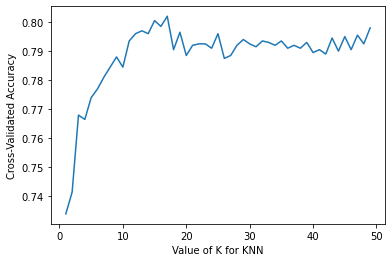

1 0.734
2 0.7415
3 0.768
4 0.7665
5 0.774
6 0.777
7 0.781
8 0.7845
9 0.788
10 0.7845
11 0.7935
12 0.796
13 0.797
14 0.796
15 0.8005
16 0.7985
17 0.802
18 0.7905
19 0.7965
20 0.7885
21 0.792
22 0.7925
23 0.7925
24 0.791
25 0.796
26 0.7875
27 0.7885
28 0.792
29 0.794
30 0.7925
31 0.7915
32 0.7935
33 0.793
34 0.792
35 0.7935
36 0.791
37 0.792
38 0.791
39 0.793
40 0.7895
41 0.7905
42 0.789
43 0.7945
44 0.79
45 0.795
46 0.7905
47 0.7955
48 0.7925
49 0.798


In [165]:
#### regular 
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_t)
    pred_t = knn.predict(test_x)
    k_scores.append(metrics.accuracy_score(test_t, pred_t))
# plot to see clearly
plt.plot(k_range, k_scores)
print('the best k is %d' % k_range[k_scores.index(max(k_scores))])
# sorted_k_scores = {sorted(k_scores, reverse=True, key=lambda item: item[1])}      
# print('the top10 k is %d' %s )
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

i = 1
for item in k_scores:
    print(i, item)
    i += 1
# k_scores

the best k is 19


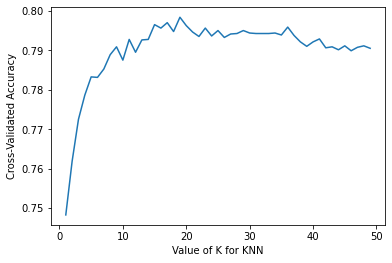

1 0.74825
2 0.7618750000000001
3 0.7725
4 0.778625
5 0.78325
6 0.783125
7 0.7852499999999999
8 0.7888749999999999
9 0.790875
10 0.7875
11 0.7927500000000001
12 0.7895
13 0.7926249999999999
14 0.7927500000000001
15 0.7965
16 0.7956249999999999
17 0.7969999999999999
18 0.7947500000000001
19 0.798375
20 0.7962499999999999
21 0.7946249999999999
22 0.7935000000000001
23 0.795625
24 0.7936249999999999
25 0.7949999999999999
26 0.79325
27 0.794125
28 0.7942500000000001
29 0.795
30 0.7943749999999999
31 0.7942500000000001
32 0.7942499999999999
33 0.79425
34 0.7943749999999999
35 0.793875
36 0.795875
37 0.79375
38 0.7921250000000001
39 0.791
40 0.7921250000000001
41 0.7928750000000001
42 0.7906249999999999
43 0.790875
44 0.790125
45 0.791125
46 0.789875
47 0.79075
48 0.7911249999999999
49 0.7905


In [164]:
### using cross evaluation 

k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_x, train_t, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
print('the best k is %d' % k_range[k_scores.index(max(k_scores))])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

i = 1
for item in k_scores:
    print(i, item)
    i += 1
# k_scores

2. KNN with random split
\n Accuracy is varies by different split 

In [206]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load all data and split into feature and target
data1 = np.loadtxt("./training/dataset_training.txt", delimiter = ",")
data2 = np.loadtxt("./testing/dataset_testing.txt", delimiter = ",")
data = np.concatenate((data1, data2), axis=0)
target = data[:, -1]
feature = data[:, :-1]

from sklearn.model_selection import train_test_split

# Shuffle the dataset before splitting
# Split dataset into training set and test set
# 70% training and 30% test
train_x, test_x, train_t, test_t = train_test_split(feature, target, test_size=0.3, shuffle=True) 

# Create knn for k = 5 (can be changed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model with the training sets
knn.fit(train_x, train_t)

# Predict the response for test dataset
pred_t = knn.predict(test_x)

# Model Evaluation for k=5

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_t, pred_t))

Accuracy: 0.7826666666666666


Accuracy: 0.7893333333333333


3. KNN with k-Fold Cross-Validation

In [207]:
from sklearn.model_selection import cross_val_score

# Create a new KNN model for K = 5
knn_cv = KNeighborsClassifier(n_neighbors=5)

# Train model with cross-validation of 10 
cv_scores = cross_val_score(knn_cv, feature, target, cv=10)


print(cv_scores)
# The mean score and the 95% confidence interval of the score estimate are hence given by:
# link: https://scikit-learn.org/stable/modules/cross_validation.html
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[0.793 0.788 0.789 0.781 0.803 0.783 0.783 0.817 0.781 0.786]
Accuracy: 0.79 (+/- 0.02)


4. Preprocessing: Normalize the data 

In [213]:
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import metrics

# Load data and split into feature and target
train_data2 = np.loadtxt("./training/dataset_training.txt", delimiter = ",")
test_data2 = np.loadtxt("./testing/dataset_testing.txt", delimiter = ",")

train_t2 = train_data2[:, -1]
train_x2 = train_data2[:, :-1]

test_t2 = test_data2[:, -1]
test_x2 = test_data2[:, :-1]

# Normalize feature attributes [0,1]
# normalize train set on each non-zero feature with "max" if axis=0
train_x2 = preprocessing.normalize(train_data2[:, :-1], norm='max', axis=0)

# normalize test set on each non-zero feature with "max" if axis=0
test_x2 = preprocessing.normalize(test_data2[:, :-1], norm='max', axis=0)

In [219]:
# Regular k
# Create knn for by defult k = 5 (can be changed using n_neighbors=x)
knn_norm = KNeighborsClassifier()

# Train the model with the training sets
knn_norm.fit(train_x2, train_t2)

# Predict the response for test dataset
pred_t2 = knn_norm.predict(test_x2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_t2, pred_t2))

Accuracy: 0.869


the best k is 9


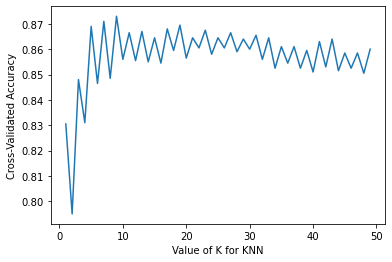

1 0.8305
2 0.795
3 0.848
4 0.831
5 0.869
6 0.8465
7 0.871
8 0.8485
9 0.873
10 0.856
11 0.8665
12 0.8555
13 0.867
14 0.855
15 0.8645
16 0.8545
17 0.868
18 0.8595
19 0.8695
20 0.8565
21 0.8645
22 0.8605
23 0.8675
24 0.858
25 0.8645
26 0.8605
27 0.8665
28 0.859
29 0.864
30 0.86
31 0.8655
32 0.856
33 0.8645
34 0.8525
35 0.861
36 0.8545
37 0.861
38 0.8525
39 0.8595
40 0.851
41 0.863
42 0.853
43 0.864
44 0.8515
45 0.8585
46 0.8525
47 0.8585
48 0.8505
49 0.86


In [229]:
#### regular 
k_range_norm = range(1, 50)
k_scores_norm = []
# use iteration to caclulator different k in models, then return the average accuracy 
for k in k_range_norm:
    knn_norm2 = KNeighborsClassifier(n_neighbors=k)
    knn_norm2.fit(train_x2, train_t2)
    pred_t3 = knn_norm2.predict(test_x2)
    k_scores_norm.append(metrics.accuracy_score(test_t2, pred_t3))
# plot to see clearly
plt.plot(k_range_norm, k_scores_norm)
print('the best k is %d' % k_range_norm[k_scores_norm.index(max(k_scores_norm))])
# sorted_k_scores = {sorted(k_scores, reverse=True, key=lambda item: item[1])}      
# print('the top10 k is %d' %s )
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

i = 1
for item in k_scores_norm:
    print(i, item)
    i += 1
# k_scores



In [230]:
#### cross validation  
from sklearn.model_selection import cross_validate
from sklearn import metrics

# Create a new KNN model for K = 5
knn_cv = KNeighborsClassifier()

# Train model with cross-validation of 10 
n = 10
cv_result = cross_validate(knn_cv, train_x2, train_t2, cv=n, return_estimator=True)
estimator = cv_result['estimator']
print(cv_result)
print(estimator)

for i in range(n):
    pred_t2 = estimator[i].predict(test_x2)
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(test_t2, pred_t2))

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_result['test_score'].mean(), cv_result['test_score'].std() * 2))

{'fit_time': array([0.00539207, 0.00422382, 0.00519395, 0.00380802, 0.00428796,
       0.00407791, 0.00415373, 0.00407577, 0.00413418, 0.00412989]), 'score_time': array([0.10810184, 0.10124397, 0.08253503, 0.0790112 , 0.0786221 ,
       0.08131719, 0.07761931, 0.08238816, 0.07983112, 0.07860899]), 'estimator': (KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()), 'test_score': array([0.8475 , 0.87   , 0.8625 , 0.85625, 0.84875, 0.83375, 0.86375,
       0.8625 , 0.8675 , 0.85375])}
(KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier())
Accuracy: 0.8625
Accuracy: 0.8675
Accuracy: 0.8675
Accuracy: 0.863
Accuracy: 0.861
Ac

In [211]:
from sklearn.model_selection import cross_validate
from sklearn import metrics

# Create a new KNN model for K = 5
knn_cv2 = KNeighborsClassifier(n_neighbors=19)

# Train model with cross-validation of 10 
n = 10
cv_result = cross_validate(knn_cv2, train_x2, train_t2, cv=n, return_estimator=True)
estimator = cv_result['estimator']
print(cv_result)
print(estimator)

for i in range(n):
    pred_t2 = estimator[i].predict(test_x2)
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(test_t2, pred_t2))

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_result['test_score'].mean(), cv_result['test_score'].std() * 2))

{'fit_time': array([0.00555587, 0.00391388, 0.0042522 , 0.00420618, 0.00422096,
       0.00405598, 0.00410008, 0.00408483, 0.00408602, 0.00485563]), 'score_time': array([0.12912416, 0.12024403, 0.10707784, 0.1153059 , 0.10394597,
       0.1016829 , 0.10134506, 0.10802531, 0.10162783, 0.10492635]), 'estimator': (KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=19)), 'test_score': array([0.88375, 0.8875 , 0.88   , 0.865  , 0.87   , 0.8575 , 0.8625 ,
       0.89   , 0.87125, 0.86625])}
(KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=19), KNeighborsClassifier(n_neighbors=

In [98]:
x = preprocessing.normalize([[3,4,5,6],[6,7,8,9]], norm='max', axis=0)
x

array([[0.5       , 0.57142857, 0.625     , 0.66666667],
       [1.        , 1.        , 1.        , 1.        ]])

F1-SCORE

In [239]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_t2, pred_t2).ravel()
print(tn, fp, fn, tp)

1185 62 200 553


In [240]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_t, pred_t).ravel()
print(tn, fp, fn, tp)

1070 177 275 478


In [245]:
from sklearn.metrics import f1_score
f1_score(test_t2, pred_t2, zero_division=1)

0.8084795321637428